In [11]:
!pip install seaborn==0.11.0

In [12]:
!pip install pycountry_convert==0.7.2

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn import  linear_model, metrics
from sklearn.model_selection import train_test_split
import pycountry_convert as pc

# installing an importing the necessary tools for nice visualizations.
!pip install plotly
import plotly.express as px

!pip install --upgrade pip
!pip install geopy
from geopy.geocoders import Nominatim

In [15]:
import pandas as pd
import numpy as np 
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_excel("/home/jovyan/work/FINAL-COMBINED-DATASET.xlsx")
fuel=pd.read_csv("/home/jovyan/work/fossil-fuels-per-capita.csv")

In [57]:
df.head(2)

City  cityID  clusterID            Typology      Country  \
0    Kabul       1          1  Congested Emerging  Afghanistan   
1  Algiers       2          1  Congested Emerging      Algeria   

   Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
0               17.7                          49.6                     0   
1               12.8                          28.7                   NaN   

   Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  ...  \
0                   32.7                             0.65  ...   
1                   55.8                             0.37  ...   

   Highway Proportion  Metro Propensity Factor  BRT Propensity Factor  \
0                 0.0                 0.079425               0.012067   
1                 NaN                 0.127131               0.081778   

   BikeShare Propensity Factor  Development Factor  Sustainability Factor  \
0                     0.373602            0.029561               0.221471   
1                     0.375540            0.118424               0.344736   

   Population Factor  Congestion Factor  Sprawl Factor  Network Density Factor  
0           0.310268           0.707286       0.211824                0.330575  
1           0.173201           0.656164       0.559870                0.380830  

[2 rows x 78 columns]

In [58]:
fuel=fuel.dropna(axis=0)
fuel.head(5)
Fuel=fuel[fuel.Year==2019]
Fuel=Fuel.rename(columns={"Entity":"Country"})

In [59]:
mergedDf=pd.merge(df, Fuel, how='left', on="Country")

In [60]:
mergedDf.head(1)

City  cityID  clusterID            Typology      Country  \
0  Kabul       1          1  Congested Emerging  Afghanistan   

   Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
0               17.7                          49.6                     0   

   Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  ...  \
0                   32.7                             0.65  ...   

   BikeShare Propensity Factor  Development Factor  Sustainability Factor  \
0                     0.373602            0.029561               0.221471   

   Population Factor  Congestion Factor  Sprawl Factor  \
0           0.310268           0.707286       0.211824   

   Network Density Factor  Code  Year  Fossil fuels per capita (kWh)  
0                0.330575   NaN   NaN                            NaN  

[1 rows x 81 columns]

In [61]:
mergedDf.columns

Index(['City', 'cityID', 'clusterID', 'Typology', 'Country',
       'Car Modeshare (%)', 'Public Transit Modeshare (%)',
       'Bicycle Modeshare (%)', 'Walking Modeshare (%)',
       'Gasoline Pump Price (USD/liter)', 'Road Deaths Rate (per 1000)',
       'Subway Length (km)', 'Subway Length Density (per km)',
       'Subway Stations per Hundred Thousand', 'Subway Ridership per Capita',
       'Subway Age (years)', 'BRT Length (km)',
       'BRT System Length Density (per km)',
       'BRT Stations per Hundred Thousand Persons',
       'BRT Fleet per Hundred Thousand Persons',
       'BRT Annual Ridership per Capita', 'BRT Age (years)',
       'Bikeshare Stations', 'Bikeshare Stations per Hundred Thousand Persons',
       'Bikeshare Number of Bikes',
       'Bikeshare Bicycles per Hundred Thousand Persons',
       'Bikeshare Age (years)', 'Congestion (%)', 'Congestion AM Peak (%)',
       'Congestion PM Peak (%)', 'Traffic Index', 'Travel Time Index',
       'Inefficiency Index', 'Po

In [62]:

PlotDf=mergedDf[['City','Fossil fuels per capita (kWh)','CO2 Emissions per Capita (metric tonnes)']]
PlotDf=PlotDf.dropna(axis=0)
len(PlotDf)

263

In [63]:
PlotDf.head(1)
PlotDf['CO2_due_to_fuel']=PlotDf['Fossil fuels per capita (kWh)']*1e-3
PlotDf=PlotDf.drop('Fossil fuels per capita (kWh)',axis=1)


In [80]:
AmountOfCity=5 #change that to change the nb displayed in the bar chart

In [81]:
A=PlotDf.sort_values(by=['CO2_due_to_fuel'], ascending=False).head(AmountOfCity)
B=PlotDf.sort_values(by=['CO2 Emissions per Capita (metric tonnes)'], ascending=False).head(AmountOfCity)

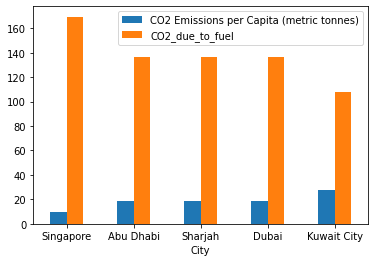

In [82]:
A=A.set_index('City')
ax = A.plot.bar(rot=0)

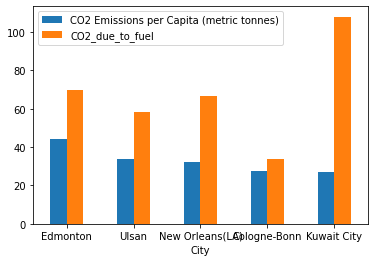

In [83]:
B=B.set_index('City')
ax = B.plot.bar(rot=0)